# Fake news Detection

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
from sklearn.metrics import roc_curve, roc_auc_score

### Inserting fake and real dataset

In [ ]:
# df_fake = pd.read_csv("/content/sample_data/Fake.csv",engine='python',error_bad_lines=False)
# df_true = pd.read_csv("/content/sample_data/True.csv",engine='python',error_bad_lines=False)

df = pd.read_csv("/content/IFND.csv", engine="pyarrow")


In [ ]:
df.head(5)

,id,Statement,Image,Web,Category,Date,Label
0,2,"b""WHO praises India's Aarogya Setu app, says i...",b'https://cdn.dnaindia.com/sites/default/files...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"b'In Delhi, Deputy US Secretary of State Steph...",b'https://cdn.dnaindia.com/sites/default/files...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,"b""LAC tensions: China's strategy behind delibe...",b'https://cdn.dnaindia.com/sites/default/files...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,b'India has signed 250 documents on Space coop...,b'https://cdn.dnaindia.com/sites/default/files...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,"b""Tamil Nadu chief minister's mother passes aw...",b'https://cdn.dnaindia.com/sites/default/files...,DNAINDIA,ELECTION,Oct-20,TRUE


In [ ]:
# df_true.head(5)

Inserting a column called "class" for fake and real news dataset to categories fake and true news.

In [ ]:
# df_fake["class"] = 0
# df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
#df_fake.shape, df_true.shape

In [ ]:
# df_fake_manual_testing = df_fake.tail(10)
# for i in range(23480,23470,-1):
#     df_fake.drop([i], axis = 0, inplace = True)
# df_true_manual_testing = df_true.tail(10)
# for i in range(21416,21406,-1):
#     df_true.drop([i], axis = 0, inplace = True)

In [ ]:
#df_fake.shape, df_true.shape

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
# df_fake_manual_testing["class"] = 0
# df_true_manual_testing["class"] = 1

In [ ]:
# df_fake_manual_testing.head(10)

In [ ]:
# df_true_manual_testing.head(10)

In [ ]:
# df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
# df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
# df_marge = pd.concat([df_fake, df_true], axis =0 )
# df_marge.head(10)

In [ ]:
# df.columns

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
df = df.drop(["id", "Image","Web","Category","Date"], axis = 1)

In [ ]:
df.head()

,Statement,Label
0,"b""WHO praises India's Aarogya Setu app, says i...",TRUE
1,"b'In Delhi, Deputy US Secretary of State Steph...",TRUE
2,"b""LAC tensions: China's strategy behind delibe...",TRUE
3,b'India has signed 250 documents on Space coop...,TRUE
4,"b""Tamil Nadu chief minister's mother passes aw...",TRUE


In [ ]:
df.dropna(subset=['Label'], inplace=True)
df.isnull().sum()

Statement    0
Label        0
dtype: int64

#### Randomly shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,Statement,Label
38411,b'Fact Check: Before US president\xe2\x80\x99s...,Fake
354,b'\x89\xdb\xf7Covid-19 situation in Latur dist...,TRUE
44475,b'Don\x92t believe this morphed picture of PM ...,Fake
15222,b'Fire at oil factory in Maharashtra\x89\xdb\x...,TRUE
41903,"b""Fact Check: PM Modi is not greeting Gautam A...",Fake


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns
#df['label'] = df['label'].astype(int)

Index(['Statement', 'Label'], dtype='object')

In [ ]:
df.head()

,Statement,Label
0,b'Fact Check: Before US president\xe2\x80\x99s...,Fake
1,b'\x89\xdb\xf7Covid-19 situation in Latur dist...,TRUE
2,b'Don\x92t believe this morphed picture of PM ...,Fake
3,b'Fire at oil factory in Maharashtra\x89\xdb\x...,TRUE
4,"b""Fact Check: PM Modi is not greeting Gautam A...",Fake


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text=str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["Statement"] = df["Statement"].apply(wordopt)

In [ ]:
lemmatizer=WordNetLemmatizer()
for index, row in text.iterrows():
  filter_sentence = []
  sentence = row['text']
  sentence = re.sub(r'[^\w\s]','', sentence) #cleaning
  words = nltk.word_tokenize(sentence) #tokenization
  words = [w for w in words if not w in stop_words] #stopwords removalx
  for word in words:
    filter_sentence.append(lemmatizer.lemmatize(word))
  print(filter_sentence)
  text.ix[index, 'text'] = filter_sentence

#### Defining dependent and independent variable as x and y

In [ ]:
x = df["Statement"]
y = df["Label"]

#### Splitting the dataset into training set and testing set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9554975668241766

<Axes: >

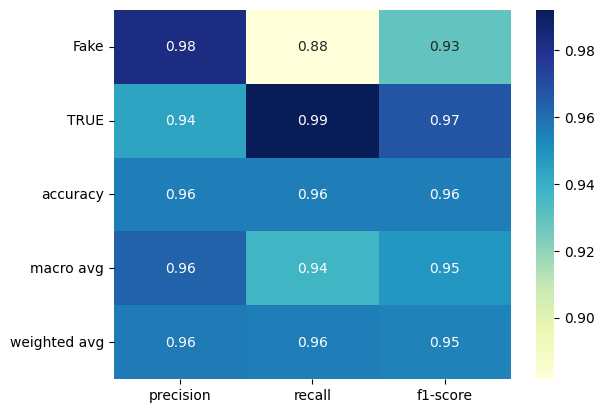

In [ ]:
clf_report=classification_report(y_test, pred_lr,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9318005501093166

<Axes: >

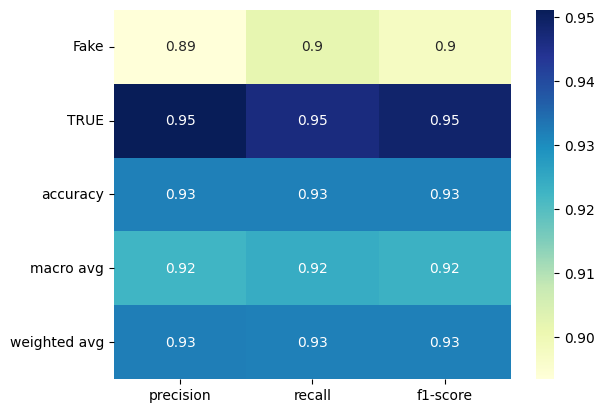

In [ ]:
clf_report=classification_report(y_test, pred_dt,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

### 3. GBD

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.940122716693702

<Axes: >

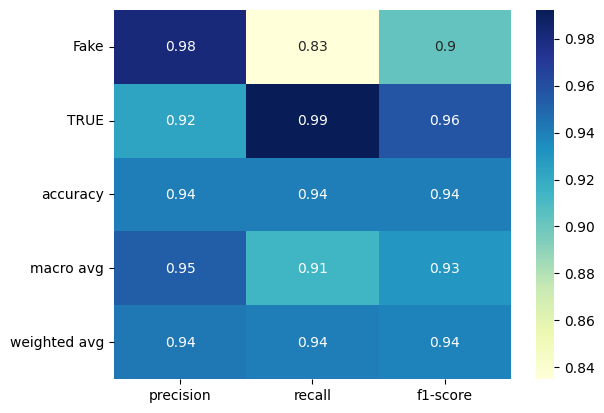

In [ ]:
clf_report=classification_report(y_test, pred_gbc,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9571196840397771

<Axes: >

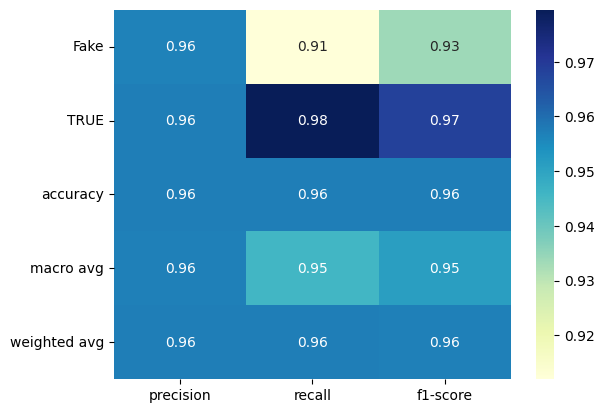

In [ ]:
clf_report=classification_report(y_test, pred_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
# news = str(input())
# manual_testing(news)